<a href="https://colab.research.google.com/github/marce3-2140/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales-Prediction Proyect**

Este proyecto es una prediccion de ventas para productos vendidos en diversas tiendas. El objetivo de este, es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de ventas.

**Diccionario de Datos**

> [byTablesGenerator](https://www.tablesgenerator.com/markdown_tables)

| Nombre de la variable     | Dtype  | Descripción                                                                                                        |
|---------------------------|--------|--------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Object | Identificación única del producto                                                                                  |
| Item_Weight               | float  | Peso del producto                                                                                                  |
| Item_Fat_Content          | Object | Si el producto es bajo en grasa o regular                                                                          |
| Item_Visibility           | float  | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | Object | Categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | float  | Precio máximo de venta al público (precio de catálogo) del producto                                                |
| Outlet_Identifier         | Object | Identificación única de la tienda                                                                                  |
| Outlet_Establishment_Year | int    | El año en que se estableció la tienda                                                                              |
| Outlet_Size               | Object | El tamaño de la tienda en cuanto al área total                                                                     |
| Outlet_Location_Type      | Object | El tipo de área donde se encuentra la tienda                                                                       |
| Outlet_Type               | Object | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |
| Item_Outlet_Sales         | float  | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |

## Importe de Librerias

In [115]:
#Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
#Importar modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
#metricas para evaluar el rendimiento
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
filename = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto1/sales_predictions_2023.csv'
df = pd.read_csv(filename)

## I. **Análisis Exploratorio**

**1. Cuántas filas y columnas**

In [118]:
df.shape

(8523, 12)

El Data Frame contiene 8523 filas y 12 columnas

**2. ¿Cuáles son los datos en cada variable?**

In [119]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3. ¿Hay duplicados?**

In [121]:
df.duplicated().value_counts()

False    8523
dtype: int64

*Respuesta*

1. No hay renglones duplicados

**4. Identifiquen los valores faltantes**

In [122]:
nulls = []
for columna in (df):
    if df[columna].isnull().any():
        nulls.append(columna)
print(nulls)

['Item_Weight', 'Outlet_Size']


In [123]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [124]:
#Encontramos valores faltamtes en Outlet_Size = 2410 (El tamaño de la tienda en cuanto al área total)
o_size_missing = df['Outlet_Size'].isna().sum()
percent_o_size_missing = (o_size_missing/len(df))*100
print(f"La columna 'Outlet_Size' tiene {percent_o_size_missing:.2f}% de datos nulos")

La columna 'Outlet_Size' tiene 28.28% de datos nulos


In [125]:
#Encontramos valores faltantes en:
#Item_Weight = 1463 (Peso del producto)
iweight_missing = df['Item_Weight'].isna().sum()
total_rows = df.shape[0]
percent_iweight_missing = (iweight_missing/total_rows)*100
print(f'La columna Item_Weight tiene {percent_iweight_missing:.2f}% de datos nulos')

La columna Item_Weight tiene 17.17% de datos nulos


## II. **Manipulación de datos**

**1. Decidan cómo abordar los valores faltantes**

(Expliquen su elección)

*Los valores faltantes en "Item_Weight" son inferiores al 28% de los datos, y los valores faltantes para "Outlet_Size" son del 17%, como ambos son inferiores al 30% de los datos, no es conveniente eliminar toda la columna, podemos buscar otras maneras de reemplazar los datos faltantes, revisaremos la correlacion de esta columna con otras columnas del dataframe, si las hubiere.*

**2. Revision de correlaciones de las columnas con datos faltantes con otras columnas**


<ipython-input-126-1b96051f1858>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

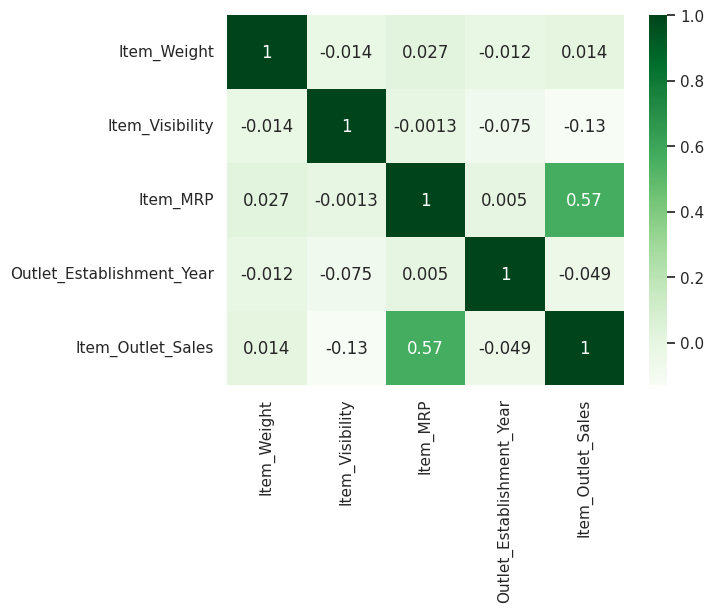

In [126]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

La Matriz de Correlación nos muestra una única correlacion positiva de grado moderada entre las columnas Item_Outlet_Sales y Item_MRP, el resto de caracteristicas numéricas no muestran correlación significativa.

1. Item_Outlet_Sales (Ventas del producto en una tienda en particular)
2. Item_MRP (Precio máximo de venta al público (precio de catálogo) del producto)

Otra correlación pero negativa y de grado bajo es entre Item_Visibility y Item_Outlet_Sales (nuestra variable objetivo).

**3. Revisamos los valores faltantes en: "Item_Weight"**

In [127]:
#Filtramos los datos nulos de Item_Weight para identificar con que otra columna puede relacionarse
iweight_missing = df['Item_Weight'].isnull() #filtro para valores NaN
df.loc[iweight_missing,:].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


Se puede observar una relacion entre la columna con datos faltantes Item Weight y Item_Identifier, vamos a revisar cada item para identificar la correlacion

In [128]:
#revisamos comparando los datos de Item_Weight con otras columnas
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


En la anterior columna encontramos una correlacion entre la columna 'Item_Weight' y el primer item de 'Item_Identifier', se observa que todos los valores no nulos del mismo identificador corresponden a 19.0

In [129]:
#revisamos comparando los datos de Item_Weight con otras columnas
df[df['Item_Identifier']=='DRI11']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


De igual manera encontramos correlacion entre la columna 'Item_Weight' y el primer segundo Item de 'Item_Identifier', se observa que todos los valores no nulos del mismo identificador corresponden a 8.26

In [130]:
#revisamos otro item al azar de la columna "Item_Identifier" para ver si corresponde igual que los anteriores
df[df['Item_Identifier']=='FDS02']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
2864,FDS02,NaN,Regular,0.000000,Dairy,196.4794,OUT027,1985,Medium,Tier 3,Supermarket Type3,5852.3820
3203,FDS02,10.195,Regular,0.145867,Dairy,194.0794,OUT046,1997,Small,Tier 1,Supermarket Type1,3901.5880
4969,FDS02,10.195,Regular,0.146692,Dairy,194.5794,OUT017,2007,NaN,Tier 2,Supermarket Type1,4096.6674
7455,FDS02,10.195,Regular,0.146094,Dairy,196.1794,OUT049,1999,Medium,Tier 1,Supermarket Type1,2926.1910


Si, efectivamente se observa una correlacion entre estas dos columnas procederemos a reemplazar los datos faltantes con la mediana de la columna "Item_Weight" donde este corresponda al "Item_Identifier" segun sea el caso.

**3.b. Identificacion de los datos faltantes para Outlet_Size**

In [131]:
O_Size_missing = df['Outlet_Size'].isnull() #filtro para valores NaN
df.loc[O_Size_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Observamos una correlacion en la columna Outlet_Size y la columna Outlet_Type cuando hay valores nulos en Outlet_Size los valores de Outlet_Type se centran en Grocery Store y Supermarket Type1.

In [132]:
#Filtramos Outlet_Type en Supermarket Type1 para conocer los datos de esa variable
df_fil = df[df['Outlet_Type']=='Supermarket Type1']
df_fil_grocery = df_fil.groupby('Outlet_Type')['Outlet_Size'].value_counts()
df_fil_grocery

Outlet_Type        Outlet_Size
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Name: Outlet_Size, dtype: int64

In [133]:
df_grosery_store = df[df['Outlet_Type']=='Grocery Store']
df_fil_grocery = df_grosery_store.groupby('Outlet_Type')['Outlet_Size'].head(10)
df_fil_grocery

3       NaN
23    Small
28      NaN
29    Small
30      NaN
45      NaN
49    Small
59    Small
63    Small
65      NaN
Name: Outlet_Size, dtype: object

Al detallar el codigo de Outlet_Type cuando es igual 'Supermarket Type1', asi como cuando es igual a "Grocery Store" encontramos que tienen los valores principalmente de Small en Outlet_Size, por lo que procederemos a rellenar los valores faltantes de la columna Outlet_Size con la moda agrupado por Outlet_Type.

**3c. Cambio el tipo de dato de la columna Year INT64 por fecha**

In [134]:
df["Outlet_Establishment_Year"] = pd.to_datetime(df["Outlet_Establishment_Year"], format='%Y')
df['Outlet_Establishment_Year'].dtypes

dtype('<M8[ns]')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                7060 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                6113 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

**4. Estadisticas resumidas para columnas numericas**

In [136]:
df.describe(include='all')

<ipython-input-136-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,9,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,1985-01-01 00:00:00,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,1463,2793,3350,5577,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,NaN,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,NaN,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,NaN,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,NaN,NaN,NaN,NaN,834.247400


In [137]:
#Tambien podemos calcular sólo las medidas estadisticas solicitadas: (valor minimo, maximo y la media)
for column in df.columns:
  if df[column].dtype != object:
    print(f"minimo para {column} es {df[column].min()}")
    print(f"maximo para {column} es {df[column].max()}")
    print(f"mediana para {column} es {df[column].median()}")
    print("--------------------------------------")


minimo para Item_Weight es 4.555
maximo para Item_Weight es 21.35
mediana para Item_Weight es 12.6
--------------------------------------
minimo para Item_Visibility es 0.0
maximo para Item_Visibility es 0.328390948
mediana para Item_Visibility es 0.053930934
--------------------------------------
minimo para Item_MRP es 31.29
maximo para Item_MRP es 266.8884
mediana para Item_MRP es 143.0128
--------------------------------------
minimo para Outlet_Establishment_Year es 1985-01-01 00:00:00
maximo para Outlet_Establishment_Year es 2009-01-01 00:00:00
mediana para Outlet_Establishment_Year es 1999-01-01 00:00:00
--------------------------------------
minimo para Item_Outlet_Sales es 33.29
maximo para Item_Outlet_Sales es 13086.9648
mediana para Item_Outlet_Sales es 1794.331
--------------------------------------


### IV. **Visualización de Datos**

Para la tercera parte del proyecto completaremos cualquier análisis estadístico que nos ayuden a comprender, explicar o modelar los datos. se debe incluir por lo menos uno de cada uno:

1. Histograma para ver las distribuciones de diversas caracteristicas en el conjunto de datos.
2. Boxplot para ver resumenes estadisticos de diversas caracteristicas en el conjunto de datos.
3. Mapa de calor de la correlación entre las características.

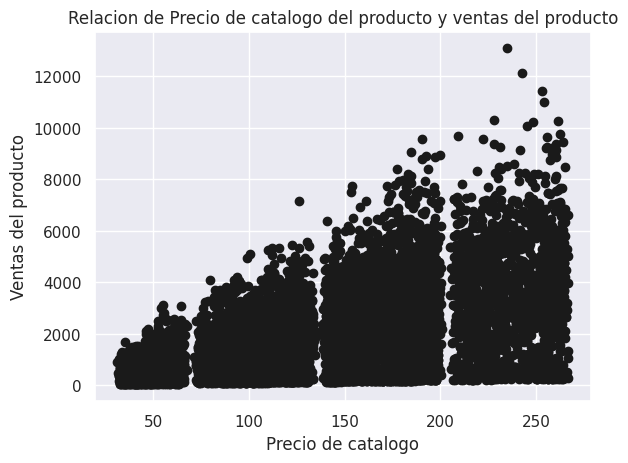

In [138]:
sales = df['Item_Outlet_Sales'].values
mrp = df['Item_MRP'].values
plt.scatter(mrp, sales, c="k" )
plt.xlabel("Precio de catalogo")
plt.ylabel("Ventas del producto")
plt.title("Relacion de Precio de catalogo del producto y ventas del producto")
plt.show()

>* Observaciones: La grafica nos muestra una correlacion entre las ventas del producto y el precio del producto, sin embargo a medida que aumenta el precio del producto tambien aumenta la dispersion en los datos y va disminuyendo la correlacion.

Visibilidad del producto segun su tipo y el tamaño de la tienda


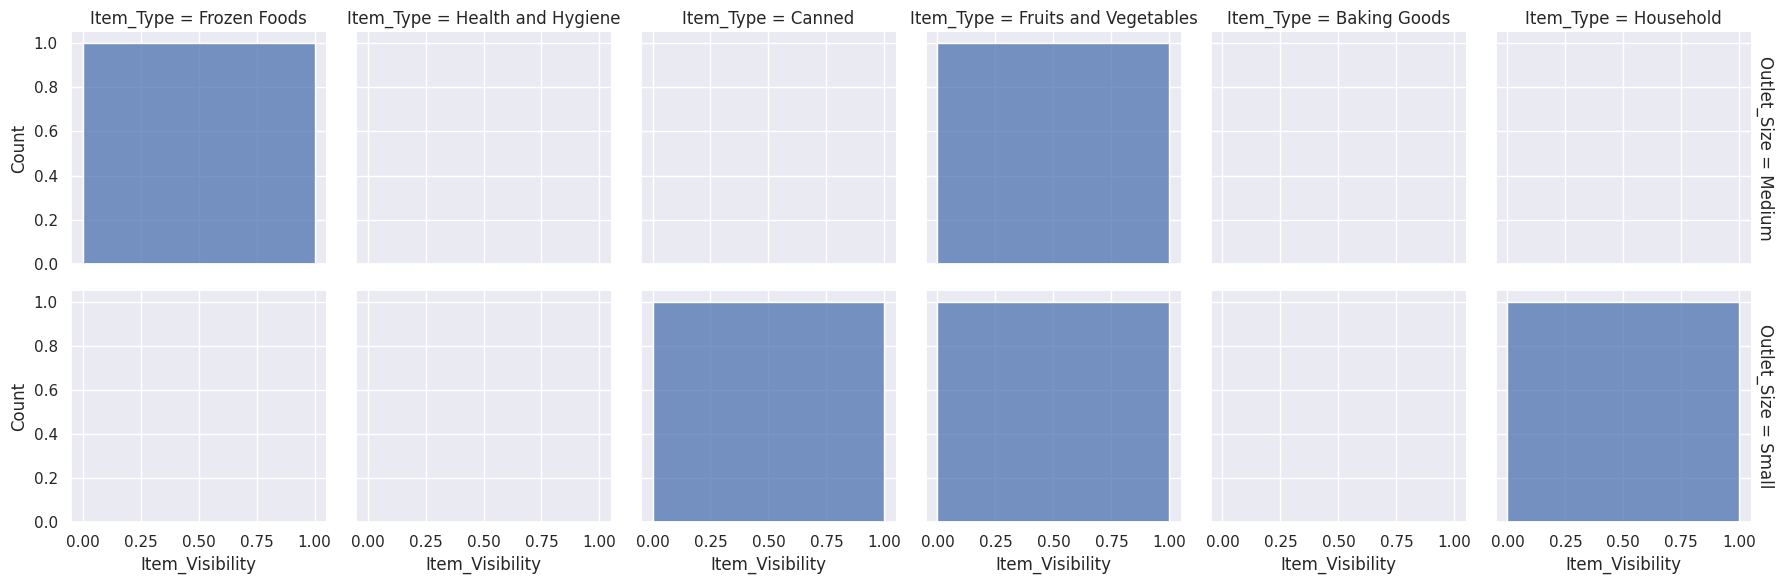

In [139]:
#Queremos Graficar la Visibilidad del producto segun su tipo y el tamaño de la tienda
# Ordenamos el DataFrame por la columna 'Item_Visibility' en orden ascendente
sorted_df = df.sort_values(by='Item_Visibility')
lowest_4 = sorted_df[:4]    # Seleccionamos las 4 primeras filas
highest_4 = sorted_df[-4:]  #Seleccionamos las 4 últimas filas

# Concatenamos ambos DataFrames para obtener un solo DataFrame con las filas deseadas
filter_visibility = pd.concat([lowest_4, highest_4])

# Seleccionamos los valores únicos de la columna 'Item_Type' en el DataFrame filtrado
item_types = filter_visibility['Item_Type'].unique()

# Grafico
sns.set_theme(style='darkgrid')
g = sns.displot(
    filter_visibility, x='Item_Visibility', col='Item_Type', row='Outlet_Size',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)
g.set_titles("Visibilidad segun el tipo de producto y el tamaño de la tienda")
print("Visibilidad del producto segun su tipo y el tamaño de la tienda")

>* Observaciones:
1. Este grafico nos muestra el indice de frecuencia de la visibilidad de los tipos de producto según el tamaño de la tienda, podemos observar que en las tiendas pequeñas Fruits and Vegetables son los de mayor visibilidad, de visibilidad media estan: household, canes, y baking goods, y con menos visibilidad estan: breads y dairy.
2. En las tiendas medianas Fruits and Vegetables, Breads y Dairy tienen una misma visibilidad media, y con menos vibilidad estan: household, canes, y baking goods.

3. Se puede identificar que las tiendas pequeñas estan más accesibles a los nichos de vivienda por lo que es más frecuente que tengas compras de frutas y verduras frescas

Text(0.5, 1.0, 'Ventas en relacion al tamaño de la tienda')

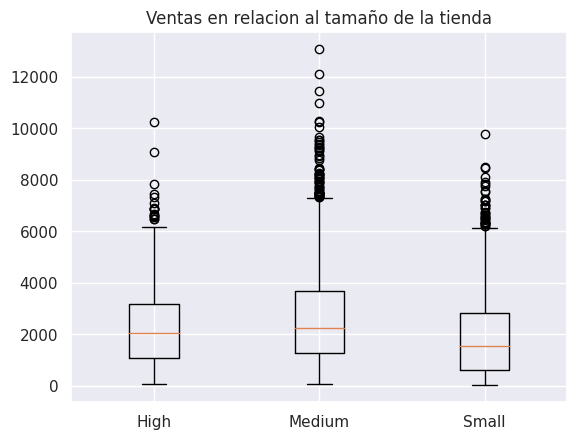

In [140]:
#Se muestra la relacion entre el tamaño de la tienda y las ventas de la tienda
High = df.loc[df['Outlet_Size']=='High','Item_Outlet_Sales'].values
Medium = df.loc[df['Outlet_Size']=='Medium','Item_Outlet_Sales'].values
Small = df.loc[df['Outlet_Size']=='Small','Item_Outlet_Sales'].values
plt.boxplot([High, Medium, Small], labels=['High', 'Medium', 'Small'])
plt.title('Ventas en relacion al tamaño de la tienda')

>* Observaciones:

1. La tienda con mayores ventas son las de tamaño Medium, ya que tiene una mediana de ventas mas alta que las medianas de High, y las ventas menos representativas las tiene las tiendas de tamaño Small.

2. Así mismo, las tiendas de tamaño Medium tiene más outliers hacia arriba

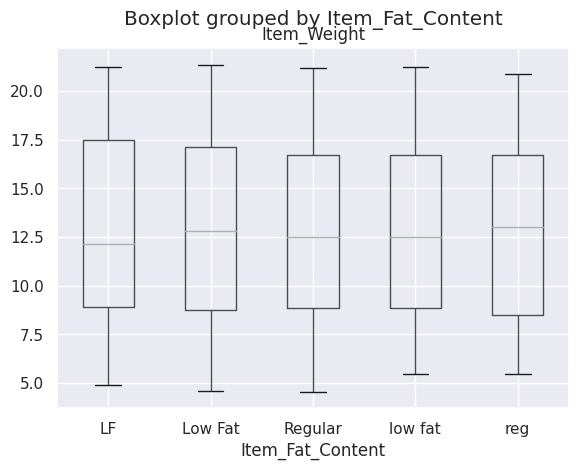

In [141]:
# Item_Outlet_Sales y Item_MRP (Precio máximo de venta al público (precio de catálogo) del producto)
#Aqui se muestra la relacion entre el peso del producto y el indice de grasa
df.boxplot(column = 'Item_Weight', by = 'Item_Fat_Content');

>* Observaciones: la grafica no nos muestra una diferencia entre el peso del producto y su contenido de grasa.

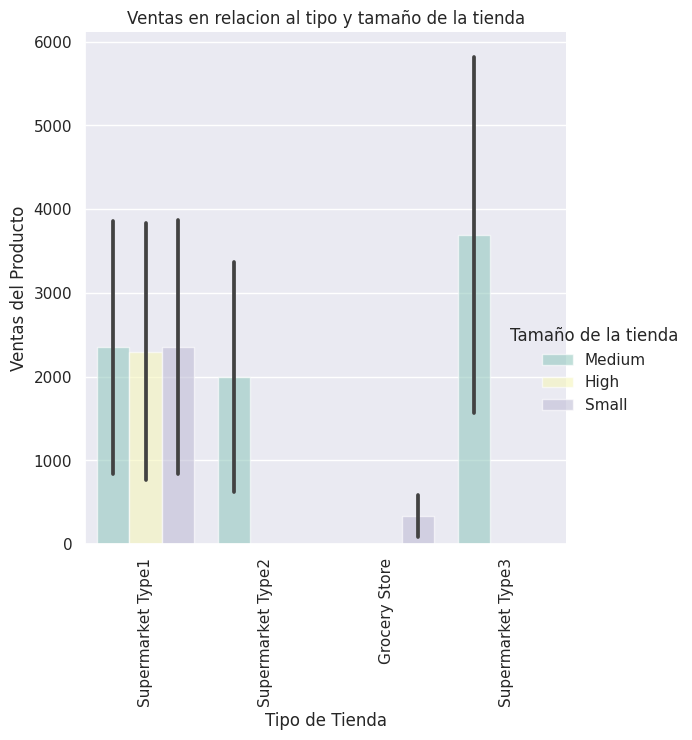

In [142]:
#Definimos las variables a graficar, el ipo de grafico y colores
g = sns.catplot(
    data=df, kind="bar",
    x='Outlet_Type', y="Item_Outlet_Sales", hue="Outlet_Size",
    errorbar="sd", palette="Set3", alpha=.6, height=6
    )
#definimos las leyendas y el titulo.
g.despine(top=True)
g.set_axis_labels("Tipo de Tienda", "Ventas del Producto")
g.legend.set_title("Tamaño de la tienda")
plt.title('Ventas en relacion al tipo y tamaño de la tienda')
plt.xticks(rotation=90);

> * Observaciones: la grafica nos muestra que las mayores ventas estan en los supermercados medianos Tipo3, tambien nos muestra que todos los supermercados Tipo1 tienen ventas similares sin importar el tamaño de la tienda.

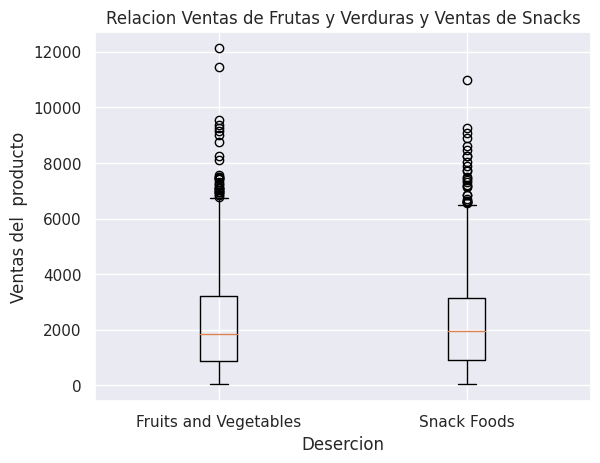

In [143]:
#boxplot para la relacion de la distancia de la casa y la desercion laboral
#La variable de comparacion debe ser numerica
plt.boxplot([df[df['Item_Type']=='Fruits and Vegetables']['Item_Outlet_Sales'], df[df['Item_Type']=='Snack Foods']['Item_Outlet_Sales']])
plt.xlabel('Desercion')
plt.ylabel('Ventas del  producto')
plt.title("Relacion Ventas de Frutas y Verduras y Ventas de Snacks")
plt.xticks([1,2], ['Fruits and Vegetables', 'Snack Foods']);

>* Observaciones: al intentar comparar los alimentos con mas contenido nutricional como los son las frutas y verduras con productos de menos contenido nutricional como los snaks no se observan diferencias en las ventas a excepcion de algunos ouliers para frutas y verduras.

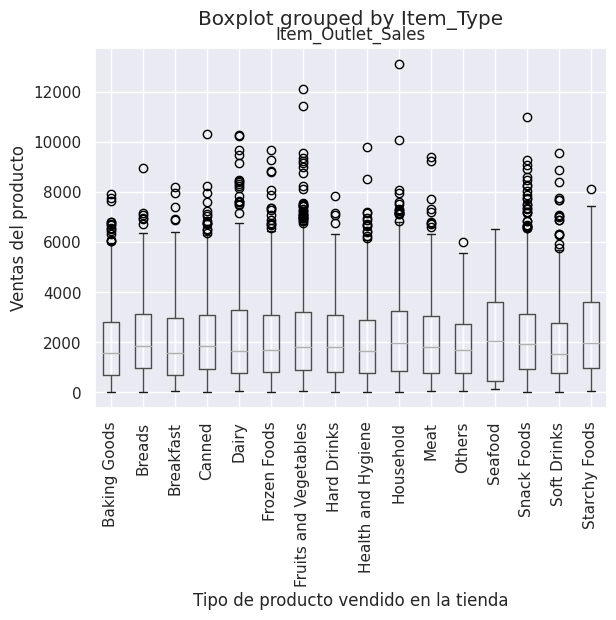

In [144]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type')
plt.xlabel("Tipo de producto vendido en la tienda")
plt.ylabel("Ventas del producto")
plt.xticks(rotation=90);

>* Observaciones: los unicos productos que sobresalen un poco de la mediana de ventas son los alimentos del mar (seafoods), alimentos a base de almidon (starchy foods), y en menor proporcion productos del hogar (household), los Dairy tienen ventas sobresalientes pero en algun punto en especifico ya que su mediana esta por debajo de los otros productos.

> Nota: Ninguno de los dos modelos esta optimo, pero en este caso los datos funcionan mejor co el modelo de Regresion Lineal.

## **Preprocesamiento**

**1. Division del DataFrame X_train, X_test, y_train, y_test**

In [145]:
#Division y validacion de la variable objetivo y resto de caracteristicas
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**2. Imputacion de Datos faltantes**

> **Nota:** Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

**2.1 Imputación para datos numéricos**

In [146]:
#Instanciamos los datos manejados con exploracion de datos para rellenar los faltantes,
#de la columna con datos numericos Item_Weight
imputer = SimpleImputer(strategy='median')

# Agrupamos el DataFrame por 'Item_Identifier' y llenamos los valores faltantes en 'Item_Weight' con la mediana
X_train['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten() if not x.isnull().all() else x)
X_test['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten() if not x.isnull().all() else x)

In [147]:
#Comprobamos si aun hay datos faltantes
iweight_missing2 = X_train['Item_Weight'].isnull() #filtro para valores NaN
X_train.loc[iweight_missing2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985-01-01,Small,Tier 1,Grocery Store
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3


In [148]:
#Comprobamos si aun hay datos faltantes
iweight_missing2 = X_test['Item_Weight'].isnull() #filtro para valores NaN
X_test.loc[iweight_missing2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985-01-01,Medium,Tier 3,Supermarket Type3


> **Nota:** Nos quedan aun 4 valores nulos, porque no tienen relacion con la columna seleccionada de Item_Identifier, estos valores los imputaremos con el pipeline masadelante.**texto en negrita**

**2.2. Imputación para Datos Categóricos**

Identificamos algunos datos de la columna Outlet Size para conocer con que variable se rellenaron nuestros datos faltantes.

In [149]:
#Small
cuenta_inicial_small = df['Outlet_Size']=='Small'
#Medium
cuenta_inicial_med = df['Outlet_Size']=='Medium'
#High
cuenta_inicial_High = df['Outlet_Size']=='High'

In [150]:
# Agrupar por 'Outlet_Type' y calcular la moda de 'Outlet_Size' para cada grupo
imputer_cat = SimpleImputer(strategy='most_frequent')

X_train['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: imputer_cat.fit_transform(x.values .reshape(-1, 1)).flatten() if not x.isnull().all() else x)
X_test['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: imputer_cat.fit_transform(x.values .reshape(-1, 1)).flatten() if not x.isnull().all() else x)

In [151]:
#Verificamos que ya no hayan datos nulos
X_train['Outlet_Size'].isna().sum()

0

In [152]:
#Verificamos que ya no hayan datos nulos
X_test['Outlet_Size'].isna().sum()

0

In [153]:
#Datos Nulos
print(f"Los datos nulos para Outlet_Size eran: {O_Size_missing.sum()}")
print("-------------------------------------------------------------")
#Small
cuenta_final_small_train = X_train['Outlet_Size']=='Small'
cuenta_final_small_test = X_test['Outlet_Size']=='Small'
print(f"Los datos iniciales de Outlet_Size = Small son: {cuenta_inicial_small.sum()}")
print(f"Despues de la imputacion Small train es = : {cuenta_final_small_train.sum()}")
print(f"Despues de la imputacion Small test es = : {cuenta_final_small_test.sum()}")

Los datos nulos para Outlet_Size eran: 2410
-------------------------------------------------------------
Los datos iniciales de Outlet_Size = Small son: 2388
Despues de la imputacion Small train es = : 3600
Despues de la imputacion Small test es = : 1198


> Nota: Como podemos observar los datos de la columna Outlet_Size, todos los valores imputados con "most_frequent" se rellenaron con el valor "Small", tal como habíamos identificado la relación entre este dato y los datos faltantes antes de la imputación.

**2.3. Revisar y arreglar valores inconsistentes con Codificacion Ordinal**

In [154]:
cat = X_train.select_dtypes(include='object')
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,FDV57,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,FDM27,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,FDG24,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,FDD05,Low Fat,Frozen Foods,OUT045,Small,Tier 2,Supermarket Type1


In [155]:
#Variable categorica con datos inconsistentes
X_train['Item_Fat_Content'].value_counts()

Low Fat    3783
Regular    2176
LF          260
reg          87
low fat      86
Name: Item_Fat_Content, dtype: int64

In [156]:
X_test['Item_Fat_Content'].value_counts()

Low Fat    1306
Regular     713
LF           56
reg          30
low fat      26
Name: Item_Fat_Content, dtype: int64

In [157]:
#Reemplazamos en la categoria lf por Low Fat
#En los datos de X_train
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace('LF', 'Low Fat')
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace('reg', 'Regular')
print(f" X_train['Item_Fat_Content']\n{X_train['Item_Fat_Content'].value_counts()}\n")
#En los datos de X_test
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace('LF', 'Low Fat')
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace('reg', 'Regular')
print(f" X_test['Item_Fat_Content']\n{X_test['Item_Fat_Content'].value_counts()}")

 X_train['Item_Fat_Content']
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64

 X_test['Item_Fat_Content']
Low Fat    1388
Regular     743
Name: Item_Fat_Content, dtype: int64


In [158]:
#Eliminamos columnas que no aportan al modelo con informacion relevante
#como es el caso de Item_Idenifier
X_train = X_train.drop('Item_Identifier',axis=1)
X_test = X_test.drop('Item_Identifier',axis=1)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002-01-01,Small,Tier 2,Supermarket Type1


**3. Instanciar los selectores de columnas**

In [159]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

**4. Instanciar Transformadores**

In [160]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='median')
#Scaler
scaler = StandardScaler()
#One-Hot-Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

**5. Instanciar Pipelines**

In [161]:
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [162]:
#Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**6. Instanciar ColumnTransformer**

In [163]:
#Crearemos Tuplas para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#Crearemos el ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bf8cfe26da0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bf8d0dab970>)])

**7. Ajustar Datos**

> **Nota:** Ajustaremos el transformador ("preprocessor") en los datos de entrenamiento.

In [164]:
#fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bf8cfe26da0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bf8d0dab970>)])

**8. Transformamos los Datos de X_train y X_test utilizando los datos ajustados con X_train en el preprocesamiento**

In [165]:
#Aplicamos el ajustador en los datos de entrenamiento a X_train y X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**9. Inspeccionar el Resultado**

In [166]:
print(np.isnan(X_train_processed).sum().sum(), 'Missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'Missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of original data is', df.shape)
print('shape of X_train_processed data  is', X_train_processed.shape)
print('\n')
X_train_processed

0 Missing values in training data
0 Missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of original data is (8523, 12)
shape of X_train_processed data  is (6392, 41)




array([[ 0.73649244, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49912746, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12665295,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00622538, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59963784, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73649244, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## III. **Creacion de Modelos de Machine Learning para Predecir las Ventas**

**1. Creamos un Modelo de Regresion Lineal**

In [167]:
#Instanciamos el Modelo
reg = LinearRegression()

In [168]:
#Entrenar el modelo en los datos de entrenamiento
#El modelo aprende la reacion entre X e y.
reg.fit(X_train_processed, y_train)

LinearRegression()

In [169]:
#Medicion del Rendimiento con R^2 para el Modelo de Regresion Lineal
train_score_reg = reg.score(X_train_processed, y_train)
print(f"El valor de R^2 en train con el modelo LinearRregression es: {train_score_reg}")
test_score_reg = reg.score(X_test_processed, y_test)
print(f"El Valor de R^2 en test con el modelo LinearRegression es: {test_score_reg}")

El valor de R^2 en train con el modelo LinearRregression es: 0.5615433546638273
El Valor de R^2 en test con el modelo LinearRegression es: 0.5671262155125443


> Nota: El rendimiento es similar para los datos de entrenamiento y de prueba, pero es un rendimiento no optimo.

In [170]:
#Obtengan las predicciones para el conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
#Obtengan las predicciones para el conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [171]:
mae_train_reg = mean_absolute_error(y_train, train_preds)
mae_test_reg = mean_absolute_error(y_test, test_preds)
print(mae_train_reg)
print(mae_test_reg)

847.1104836201503
804.0435111215393


In [172]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(f"El valor de RMSE train con modelo linearRegression es: {rmse_train}")
print(f"El valor de RMSE test con modelo linearRegression es: {rmse_test}")

El valor de RMSE train con modelo linearRegression es: 1139.1194056058014
El valor de RMSE test con modelo linearRegression es: 1092.8352757336315


> **Nota:**
* La diferencia del error entre los datos de train y test en el Modelo de Regresion Lineal no es muy grande.
* El RMSE no es menor que el error absoluto medio lo que demuestra que no esta logrando una buena prediccion.

In [173]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = Ridge()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 90.0, 500.0]}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_processed, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'alpha': 10.0}


In [174]:
ridge = Ridge(alpha= 10)
ridge.fit(X_train_processed, y_train)
y_predicho = ridge.predict(X_test_processed)
#Medicion del Rendimiento con R^2 para el Modelo Ridge
train_score_reg = ridge.score(X_train_processed, y_train)
print(f"El valor de R^2 en train con el modelo LinearRregression es: {train_score_reg}")
test_score_reg = reg.score(X_test_processed, y_test)
print(f"El Valor de R^2 en test con el modelo LinearRegression es: {test_score_reg}")

El valor de R^2 en train con el modelo LinearRregression es: 0.5615246477079929
El Valor de R^2 en test con el modelo LinearRegression es: 0.5671262155125443


> Nota: El modelo Ridge muestra los mismos resultados que el modelo anterior LinearRegresion

**2. Creamos un Modelo de Arbol de Decision**

In [175]:
#Instanciamos el Modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

In [176]:
#Ajustamos el Modelo a los Datos de entrenamiento
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [177]:
#Hacemos preedicciones
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed)

In [178]:
# evalúen el modelo
train_score_tree = dec_tree.score(X_train_processed, y_train)
test_score_tree = dec_tree.score(X_test_processed, y_test)
print(f"Valor de R^2 en train con el modelo de DecissionTree es: {train_score_tree}")
print(f"Valor de R^2 en test con el modelo de DecissionTree es: {test_score_tree}")

Valor de R^2 en train con el modelo de DecissionTree es: 1.0
Valor de R^2 en test con el modelo de DecissionTree es: 0.17386832374515804


> Nota: El modelo de Arbol de regresion muestra un sobreajuste y un rendimiento muy malo en los datos de prueba.

In [179]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)


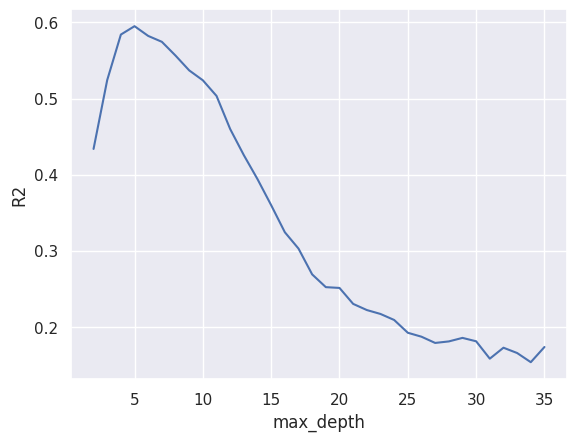

In [180]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta

plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


> Nota: se puede observar en la imagen un mejor rendimiento con un max_depth en 5, sin embargo el rendimiento del modelo aun no es muy optimo.

In [181]:
#Ejecutamos el modelo con el valor optimizado para max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(f"El valor de R^2 mas optimo para DecissionTreeReg en train {train_5_score}")
print(f"El valor de R^2 mas optimo para DecisionTreeReg en test {test_5_score}")

El valor de R^2 mas optimo para DecissionTreeReg en train 0.6039092654846364
El valor de R^2 mas optimo para DecisionTreeReg en test 0.594954272967407


In [182]:
mae_train_tree = mean_absolute_error(y_train, train_preds_tree)
mae_test_tree = mean_absolute_error(y_test, test_preds_tree)
print(mae_train_tree)
print(mae_test_tree)

0.0
1036.1919447207886


In [183]:
rmse_train_tree = np.sqrt(mean_squared_error(y_train, train_preds_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, test_preds_tree))
print(f"El valor de RMSE train con modelo DecissionTree es: {rmse_train_tree}")
print(f"El valor de RMSE test con modelo DecissionTree es: {rmse_test_tree}")

El valor de RMSE train con modelo DecissionTree es: 0.0
El valor de RMSE test con modelo DecissionTree es: 1509.7279660669828


> Nota: El modelo de Decission Tree esta sobreajustado

**Intentamos mejorar los parametros para DecisionTreeRegresor**

In [184]:
param_grid = {
    'max_depth': [None, 5, 6],  # Profundidad máxima del árbol
    'min_samples_split': [1, 2, 5, 15, 40],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 8, 12,20]  # Mínimo de muestras en un nodo hoja
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(dec_tree_5, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_processed, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir en los datos de prueba con el mejor modelo
y_pred = best_model.predict(X_test_processed)

# Calcular el error cuadrado medio en los datos de prueba
mse = mean_squared_error(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Error cuadrado medio en prueba:", mse)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Error cuadrado medio en prueba: 1114552.6112699383


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

In [185]:
#Ejecutamos el modelo con el valor optimizado para max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth=5, min_samples_leaf= 20, min_samples_split= 2, random_state=42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(f"El valor de R^2 mas optimo para DecissionTreeReg en train {train_5_score}")
print(f"El valor de R^2 mas optimo para DecisionTreeReg en test {test_5_score}")

El valor de R^2 mas optimo para DecissionTreeReg en train 0.6037035076707084
El valor de R^2 mas optimo para DecisionTreeReg en test 0.5960268987368175


###IV. **Conclusiones**

1. Encontramos una correlacion moderada entre el precio del producto y el precio de catalogo del producto, esto nos puede indicar que el precio máximo de venta al público ha estado bien recibido por los clientes ya que esta relacionado con las ventas del producto, sin embargo la correlacion es moderada no alta, por lo que hace falta revisar otras variables que nos indiquen el mejor camino sobre los precios de venta para aumentar las ventas del producto.

2. Encontramos una correlacion entre las ventas de la tienda y el tipo de tienda supermarket Tipo1 y Supermarket Tipo3, con las mejores ventas, sin importar el tamaño de la tienda.

3. El modelo de regresion que mejor se ajusta al conjunto de datos es el de arbol de regresion, sin embargo despues de ajustar los parametros no se logro aumentar el accuracy a mas de 0.60

###V. **Referencias**

* [Curso Coding Dojo - Data Science](https://github.com/fralfaro/CD-DS-Course)
* [Kaggle - Competitions](https://www.kaggle.com/competitions)